# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [58]:
print("The dataset collected is related to 17 marketing campaigns that occurred between May 2008 and November 2010.")

The dataset collected is related to 17 marketing campaigns that occurred between May 2008 and November 2010.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Checks for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# Displays the data types of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [8]:
# Converts categorical columns to category data type
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [9]:
# Checks the updated data types
print("Updated data types of each column:\n", df.dtypes)

Updated data types of each column:
 age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object


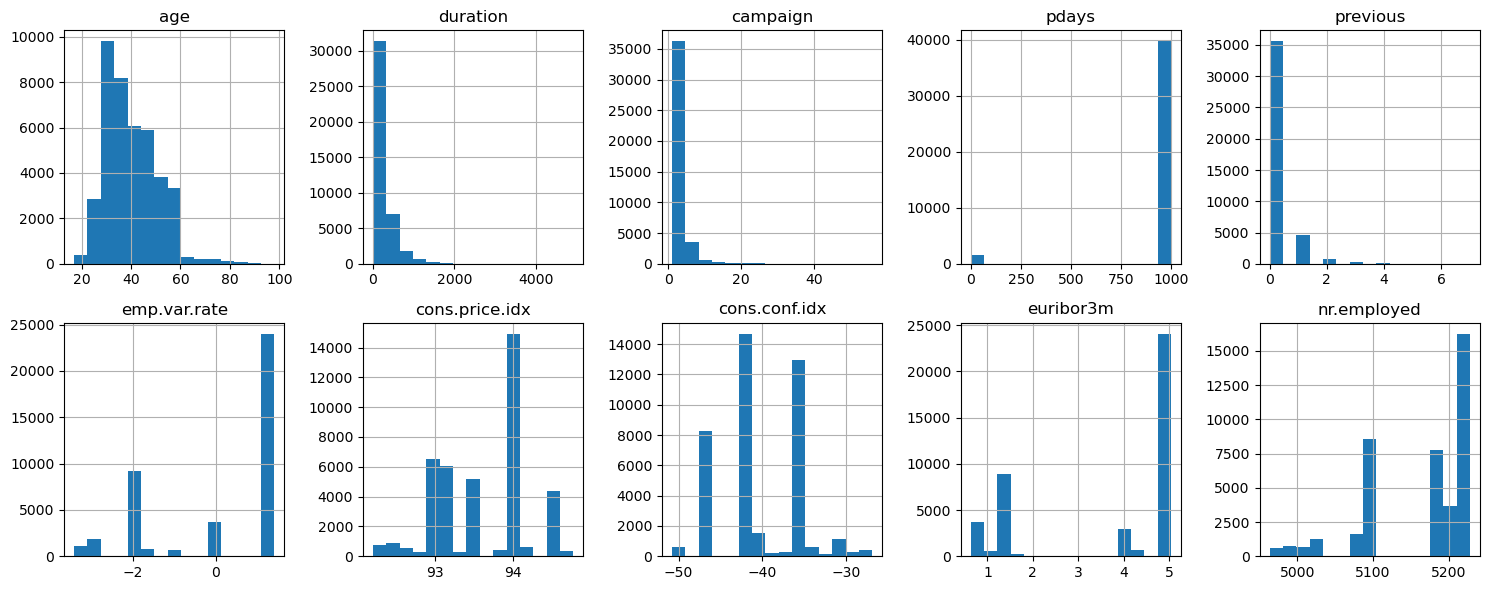

In [10]:
# Plots distributions for numeric features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, 5))
plt.tight_layout()
plt.show()


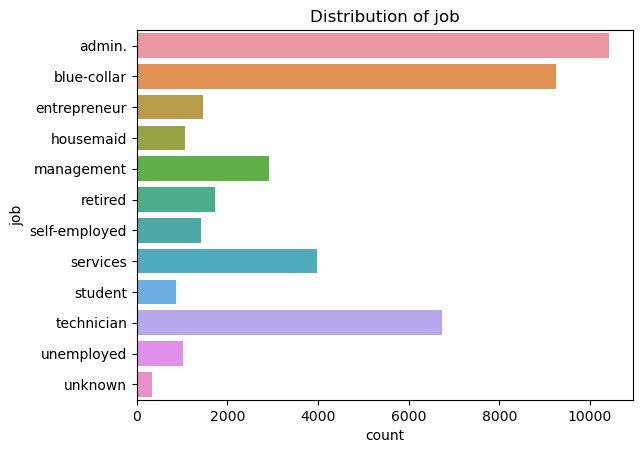

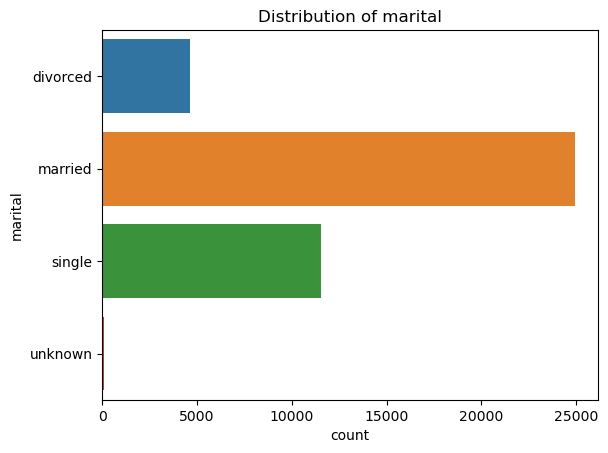

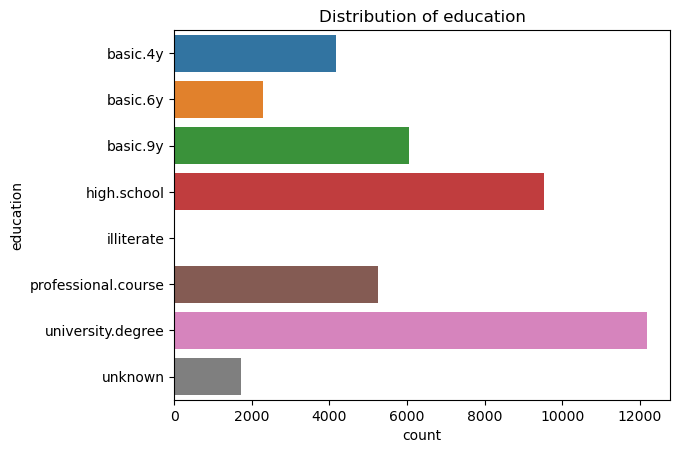

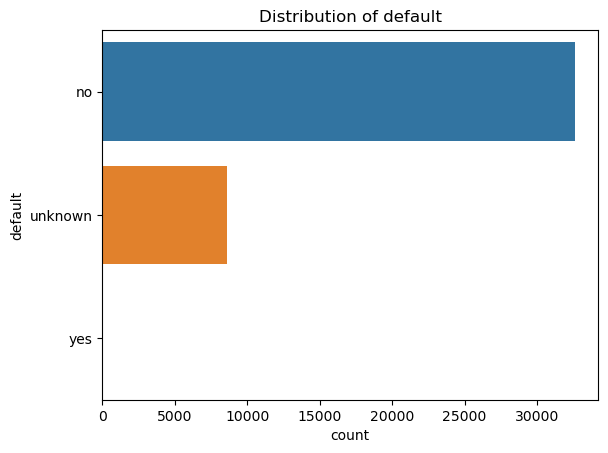

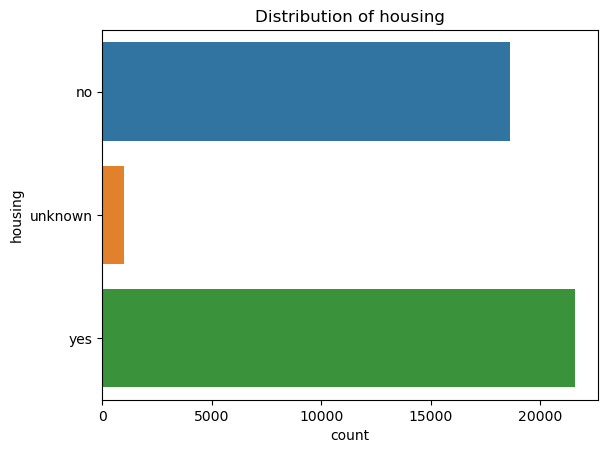

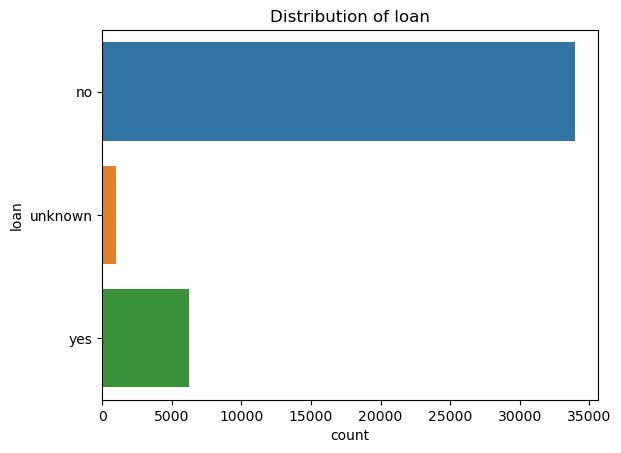

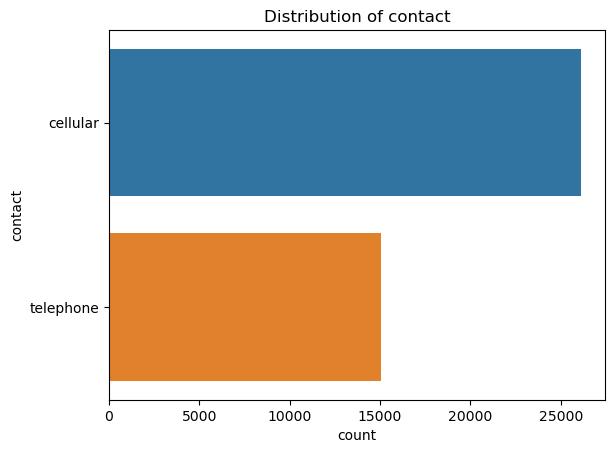

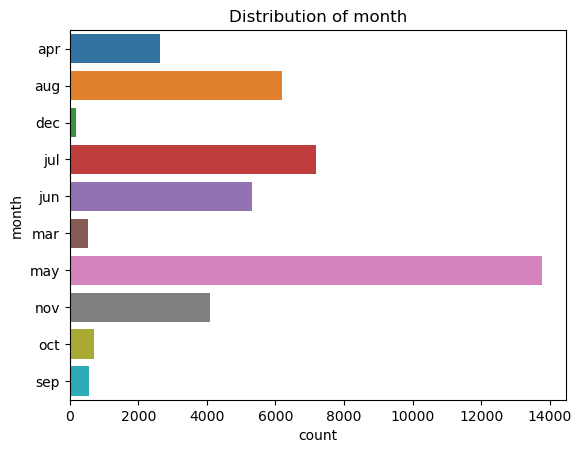

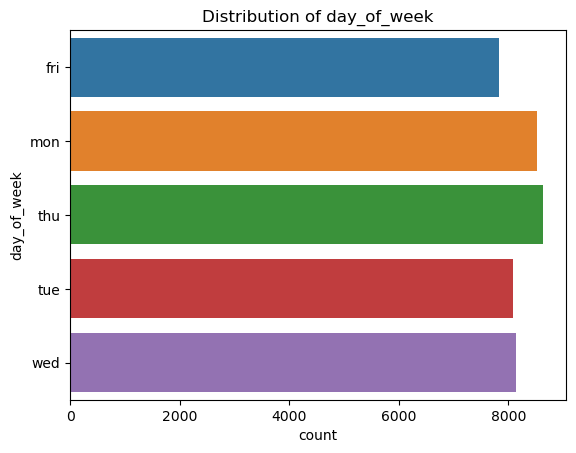

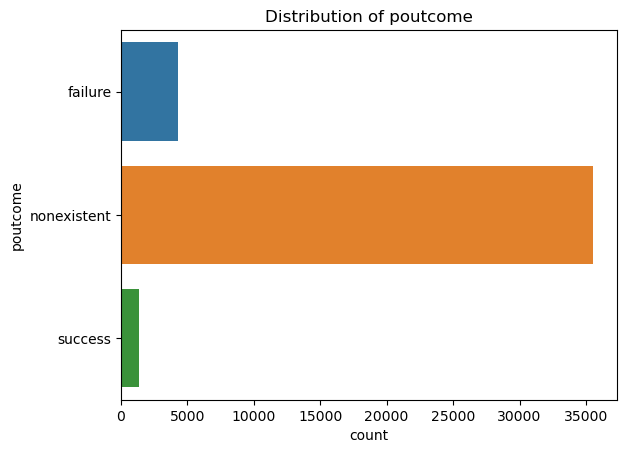

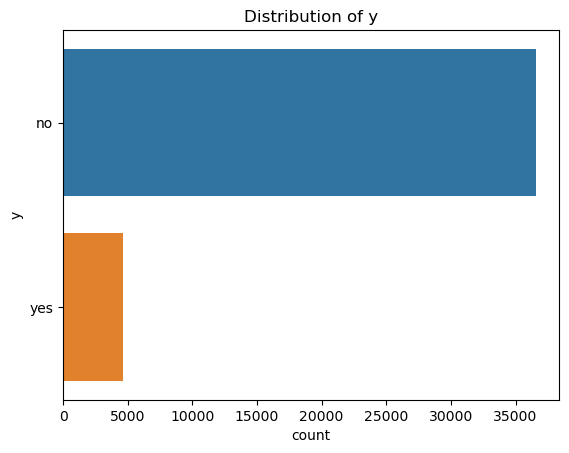

In [11]:
# Plots count plots for categorical features
for column in categorical_columns:
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [57]:
# Business Objective
print("Business Objective: The objective is to build predictive models to determine whether a client will subscribe to a long-term deposit.")


Business Objective: The objective is to build predictive models to determine whether a client will subscribe to a long-term deposit.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
# Selects relevant features and target column
bank_features = df[['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'age']]
target = df['y']

In [15]:
# Encodse categorical variables using one-hot encoding
bank_features_encoded = pd.get_dummies(bank_features, drop_first=True)

In [16]:
# Encodes target column
target_encoded = target.map({'no': 0, 'yes': 1})

In [17]:
# Verify the shapes of the features and target
print("Shape of bank_features_encoded:", bank_features_encoded.shape)
print("Shape of target_encoded:", target_encoded.shape)

Shape of bank_features_encoded: (41188, 34)
Shape of target_encoded: (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bank_features_encoded, target_encoded, test_size=0.3, random_state=42, stratify=target_encoded)

In [22]:
# Normalizes the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Verifies the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32950, 34)
Shape of X_test: (8238, 34)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
# Calculates the baseline accuracy
baseline_accuracy = target_encoded.value_counts(normalize=True).max()
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
# Trains the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [26]:
y_pred_log_reg = log_reg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [27]:
# Calculates and prints the accuracy
train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
print("Training Accuracy of Logistic Regression:", train_accuracy_log_reg)

test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Test Accuracy of Logistic Regression:", test_accuracy_log_reg)

Training Accuracy of Logistic Regression: 0.808133535660091
Test Accuracy of Logistic Regression: 0.8089342073318767


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [28]:
# Initializes the models
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
svm = SVC(probability=True, random_state=42, class_weight='balanced')

In [29]:
# Initializes a dictionary to store the results
results = {
    'Model': [],
    'Train Time': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

In [30]:
# Function to fit and score models
def fit_and_score_model(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    results['Model'].append(model_name)
    results['Train Time'].append(train_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

In [31]:
# Fits and scores Logistic Regression model
fit_and_score_model(log_reg, 'Logistic Regression')

In [32]:
# Fits and scores KNN model
fit_and_score_model(knn, 'KNN')

In [33]:
# Fits and scores Decision Tree Model model
fit_and_score_model(dt, 'Decision Tree')

In [34]:
# Fits and scores SVM model
fit_and_score_model(svm, 'SVM')

In [35]:
# Creates a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.313550        0.808134       0.808934
1                  KNN    0.015410        0.906798       0.892328
2        Decision Tree    0.254232        0.881062       0.768390
3                  SVM  892.337569        0.826404       0.825443


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [38]:
# Feature importance using Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(bank_features_encoded, target_encoded)

DecisionTreeClassifier(random_state=42)

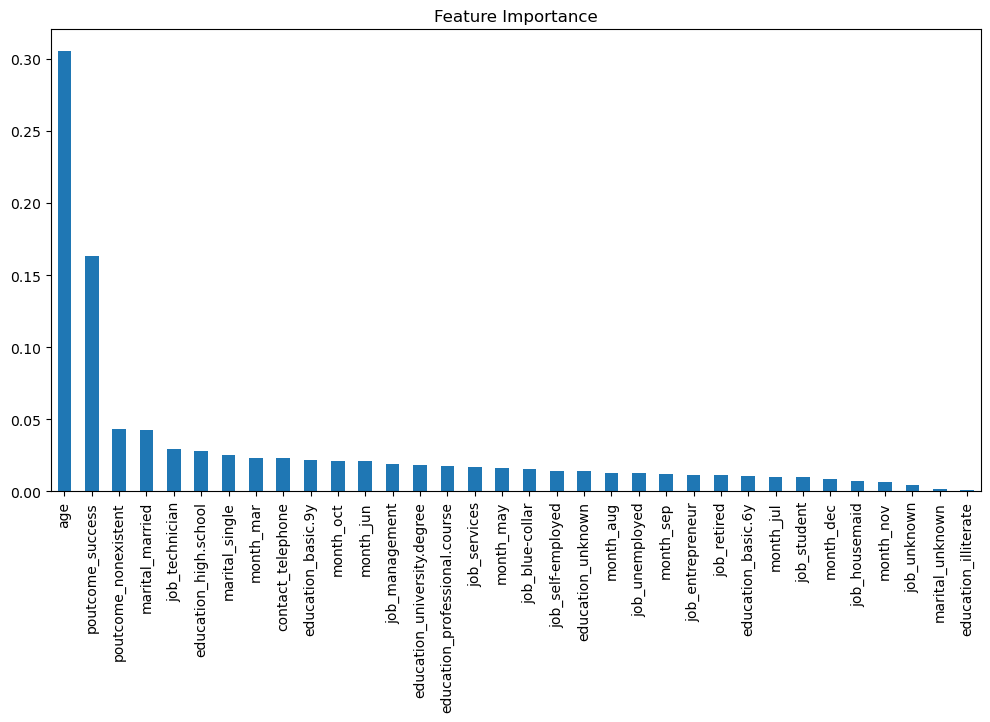

In [39]:
# Plots feature importance
feature_importances = pd.Series(dt.feature_importances_, index=bank_features_encoded.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

In [40]:
# Selects important features
selector = SelectFromModel(dt, threshold="median")
X_important_train = selector.fit_transform(X_train, y_train)
X_important_test = selector.transform(X_test)

In [41]:
# Prints the selected features
selected_features = bank_features_encoded.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['age', 'job_blue-collar', 'job_management', 'job_technician',
       'marital_married', 'marital_single', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'contact_telephone', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


In [42]:
# Hyperparameter Tuning
# KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best KNN params:", knn_grid.best_params_)
print("Best KNN score:", knn_grid.best_score_)

Best KNN params: {'n_neighbors': 11}
Best KNN score: 0.8931411229135053


In [43]:
# Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30, 40]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print("Best Decision Tree params:", dt_grid.best_params_)
print("Best Decision Tree score:", dt_grid.best_score_)

Best Decision Tree params: {'max_depth': 10}
Best Decision Tree score: 0.8931411229135053


In [44]:
# Uses a smaller subset of the training data for faster hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

In [45]:
# Hyperparameter tuning for SVM on smaller subset
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_random = RandomizedSearchCV(SVC(random_state=42), svm_params, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
svm_random.fit(X_train_small, y_train_small)
print("Best SVM params (small set):", svm_random.best_params_)
print("Best SVM score (small set):", svm_random.best_score_)

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best SVM params (small set): {'kernel': 'linear', 'C': 0.1}
Best SVM score (small set): 0.9022782758294924


In [46]:
# Refines the search on the full dataset
svm_params_refined = {'C': [svm_random.best_params_['C'] / 2, svm_random.best_params_['C'], svm_random.best_params_['C'] * 2], 'kernel': [svm_random.best_params_['kernel']]}
svm_grid_refined = GridSearchCV(SVC(random_state=42), svm_params_refined, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid_refined.fit(X_train, y_train)
print("Best SVM params (full set):", svm_grid_refined.best_params_)
print("Best SVM score (full set):", svm_grid_refined.best_score_)

Best SVM params (full set): {'C': 0.05, 'kernel': 'linear'}
Best SVM score (full set): 0.8973292295049023


In [47]:
# Function that evaluates the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

In [48]:
# Evaluates the tuned models
best_knn = knn_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_svm = svm_grid_refined.best_estimator_

In [49]:
# Initialize models with Logistic Regression and best tuned models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'SVM': best_svm
}

model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']

In [50]:
# Fits and scores each model
results = {
    'Model': [],
    'Train Time': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'F1 Score': []
}

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_important_train, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_important_train))
    test_accuracy, f1 = evaluate_model(model, X_important_test, y_test)
    
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['F1 Score'].append(f1)
    results['Train Time'].append(train_time)

In [51]:
# Creates a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy  F1 Score
0  Logistic Regression    0.146995        0.896510       0.897548  0.287162
1                  KNN    0.007651        0.900243       0.896091  0.287854
2        Decision Tree    0.047082        0.903824       0.895970  0.291150
3                  SVM   11.919048        0.897329       0.897791  0.295987


In [52]:
# Plots the ROC and Precision-Recall curves
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

In [53]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        average_precision = average_precision_score(y_test, y_pred_proba)
        
        plt.figure()
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title(f'Precision-Recall curve for {model_name}: AP={average_precision:0.2f}')
        plt.show()

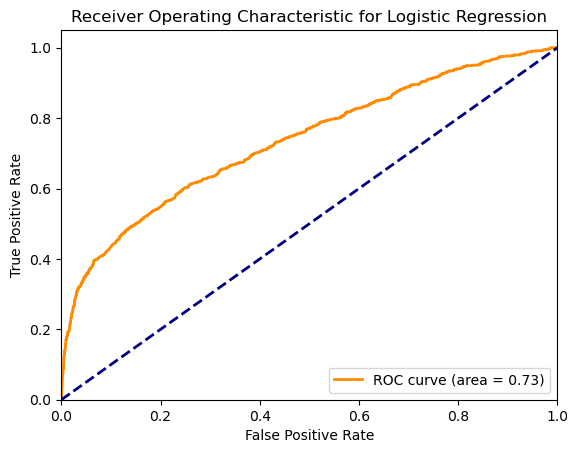

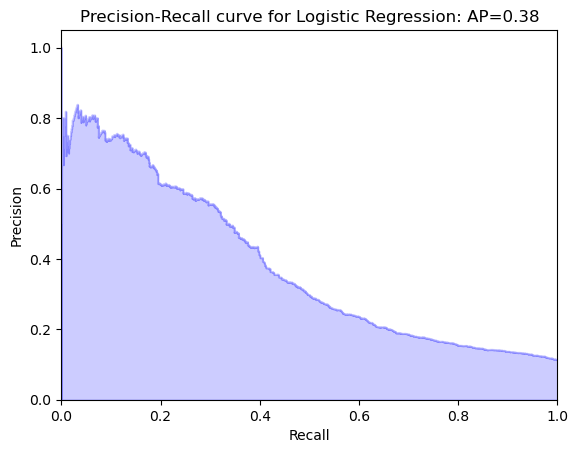

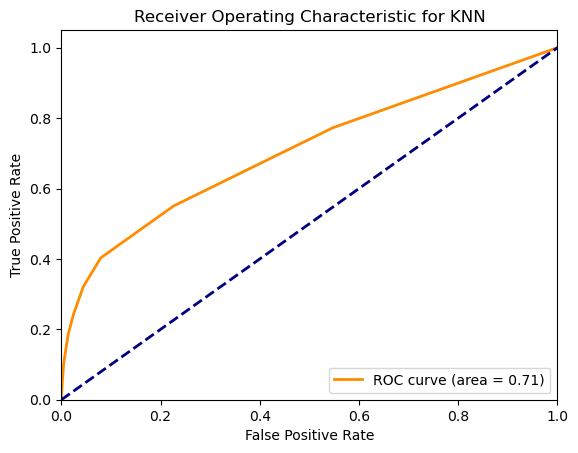

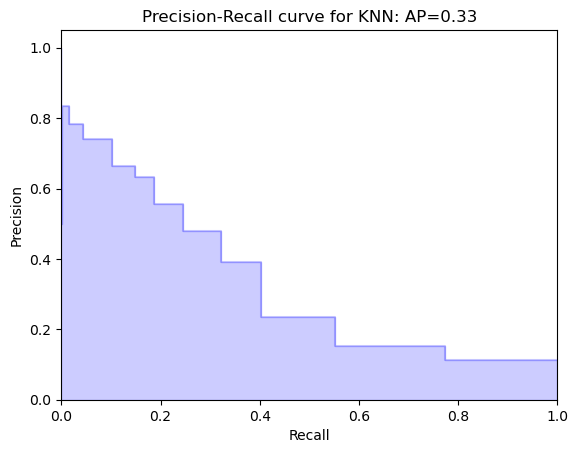

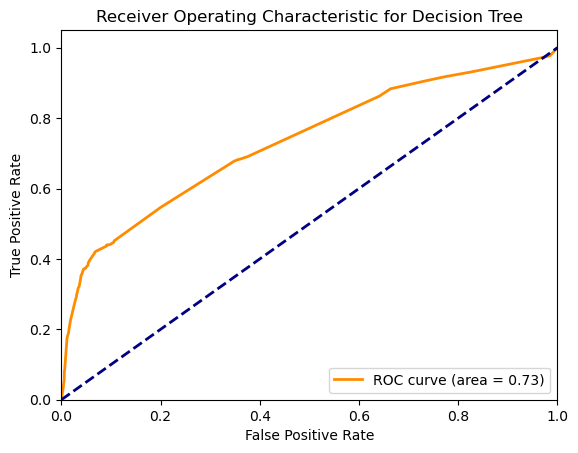

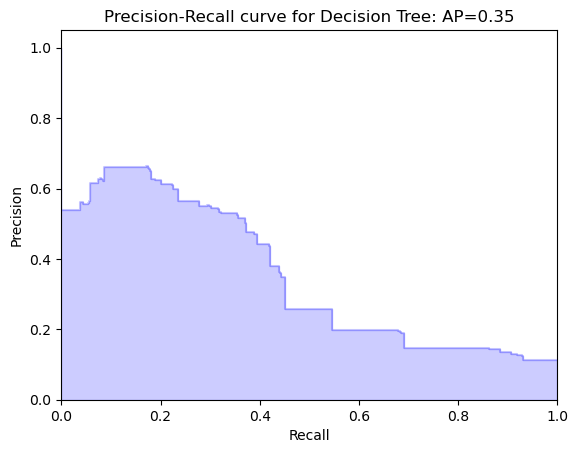

In [54]:
# Evaluates and plots curves for each model
for model_name, model in models.items():
    plot_roc_curve(model, X_important_test, y_test, model_name)
    plot_precision_recall_curve(model, X_important_test, y_test, model_name)

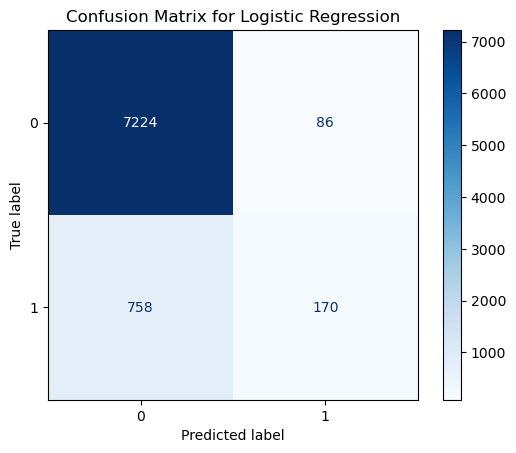

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.66      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



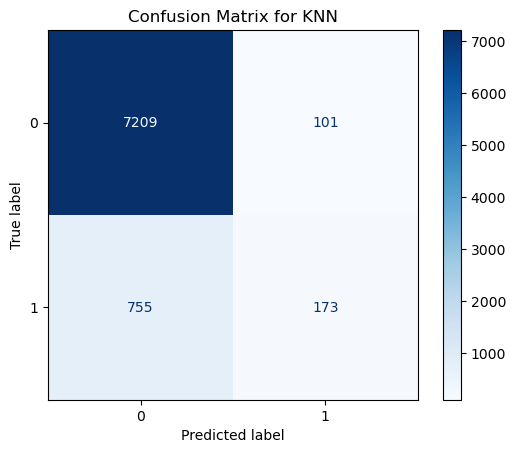

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.63      0.19      0.29       928

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



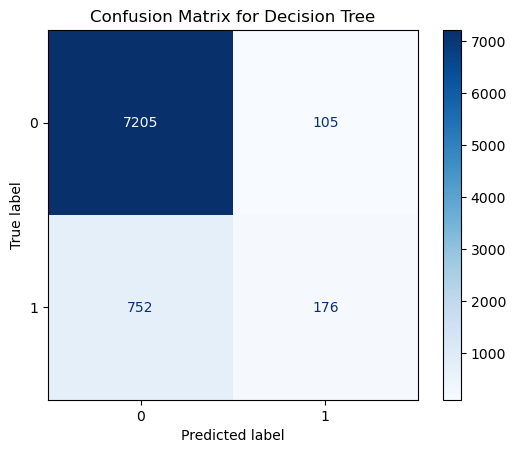

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.63      0.19      0.29       928

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



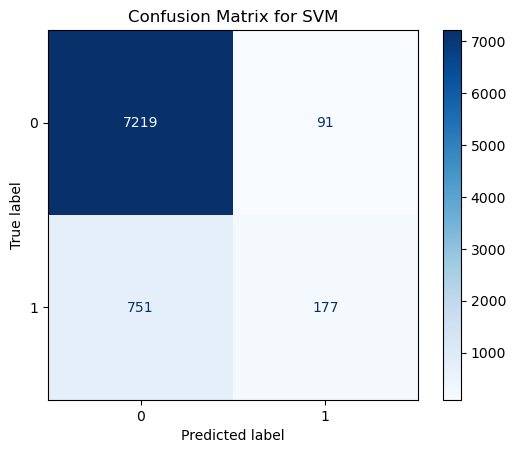

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.66      0.19      0.30       928

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [56]:
# Creates a Confusion Matrix and Classification Report
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred))

for model_name, model in models.items():
    plot_confusion_matrix(model, X_important_test, y_test, model_name)

##### Questions